In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_divar_cleaned_merge1.csv")
df.head()

Unnamed: 0                district  area  year  rooms        value  floor  \
0           0                 نیاوران   257  1390      3  25000000000      3   
1           1  دریاچه شهدای خلیج فارس   132  1390      3   6000000000      4   
2           2                    طرشت    85  1392      2   4200000000      4   
3           3                   ولنجک   341  1400      4  76725000000     11   
4           4                 دارآباد   145  1401      3  13000000000      5   

   elevator  parking  warehouse  District       long        lat  
0      True     True       True         1  51.457212  35.803494  
1      True     True       True        18  51.297343  35.660482  
2      True     True       True         2  51.360976  35.761308  
3      True     True       True         1  51.457212  35.803494  
4      True     True       True         1  51.457212  35.803494

In [12]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [13]:
df['value_metr'] = ((df['value'] / df['area'])/ 1000000).round(0)
df.head()

district  area  year  rooms        value  floor  elevator  \
0                 نیاوران   257  1390      3  25000000000      3         1   
1  دریاچه شهدای خلیج فارس   132  1390      3   6000000000      4         1   
2                    طرشت    85  1392      2   4200000000      4         1   
4                 دارآباد   145  1401      3  13000000000      5         1   
5              سعادت آباد   110  1399      2  13750000000      1         1   

   parking  warehouse  District       long        lat  value_metr  
0        1          1         1  51.457212  35.803494        97.0  
1        1          1        18  51.297343  35.660482        45.0  
2        1          1         2  51.360976  35.761308        49.0  
4        1          1         1  51.457212  35.803494        90.0  
5        1          1         2  51.360976  35.761308       125.0

In [4]:
df['elevator'] = df['elevator'].astype('int64')
df['parking'] = df['parking'].astype('int64')
df['warehouse'] = df['warehouse'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54553 entries, 0 to 56520
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    54553 non-null  object 
 1   area        54553 non-null  int64  
 2   year        54553 non-null  int64  
 3   rooms       54553 non-null  int64  
 4   value       54553 non-null  int64  
 5   floor       54553 non-null  int64  
 6   elevator    54553 non-null  int64  
 7   parking     54553 non-null  int64  
 8   warehouse   54553 non-null  int64  
 9   District    54553 non-null  int64  
 10  long        54537 non-null  float64
 11  lat         54537 non-null  float64
 12  value_metr  54553 non-null  float64
dtypes: float64(3), int64(9), object(1)
memory usage: 7.8+ MB


In [15]:
df.describe()

area          year         rooms         value         floor  \
count  54553.000000  54553.000000  54553.000000  5.455300e+04  54553.000000   
mean     115.909244   1393.513611      2.236339  1.015941e+10      4.002383   
std       49.893984      7.446645      0.710158  9.510293e+09      3.729369   
min        2.000000   1371.000000      0.000000  5.000000e+07      1.000000   
25%       79.000000   1387.000000      2.000000  4.200000e+09      2.000000   
50%      108.000000   1396.000000      2.000000  7.200000e+09      3.000000   
75%      141.000000   1401.000000      3.000000  1.278000e+10      5.000000   
max      288.000000   1401.000000      4.000000  8.000000e+10     30.000000   

           elevator       parking     warehouse      District          long  \
count  54553.000000  54553.000000  54553.000000  54553.000000  54537.000000   
mean       0.864315      0.905963      0.905963      6.544296     51.377697   
std        0.342456      0.291883      0.291883      6.168429      0.078625   
min        0.000000      0.000000      0.000000      0.000000     51.192887   
25%        1.000000      1.000000      1.000000      2.000000     51.302234   
50%        1.000000      1.000000      1.000000      5.000000     51.361931   
75%        1.000000      1.000000      1.000000      9.000000     51.444402   
max        1.000000      1.000000      1.000000     22.000000     51.524812   

                lat    value_metr  
count  54537.000000  54553.000000  
mean      35.745924     76.882225  
std        0.045181     39.954133  
min       35.602940      5.000000  
25%       35.725171     51.000000  
50%       35.758611     70.000000  
75%       35.761308     93.000000  
max       35.803494    286.000000

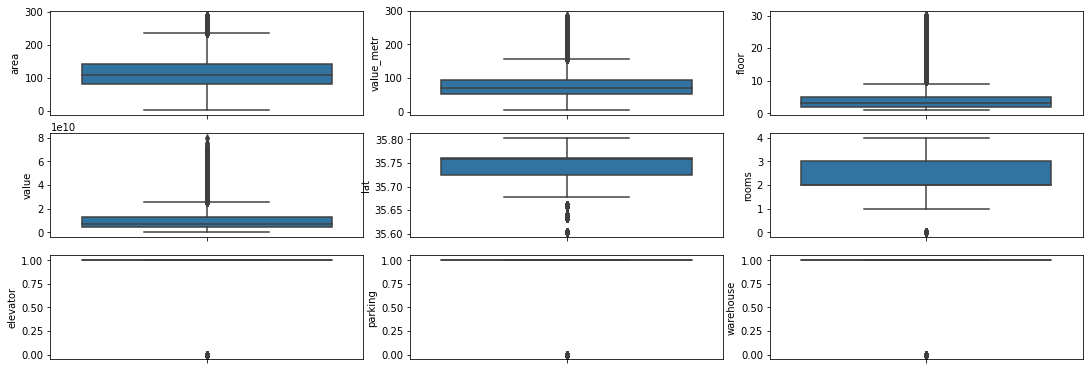

In [104]:
df2 = df[['area', 'value_metr', 'floor', 'value', 'lat', 'rooms', 'elevator', 'parking', 'warehouse']]
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df2:
  sns.boxplot(y=i, data=df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [105]:
df2_ = df[['area', 'value_metr', 'floor', 'value', 'lat', 'rooms', 'elevator', 'parking', 'warehouse']]
for i in df2_:
  df2.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df2[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df2[i][(df2[i] < lower_bound) | (df2[i] > upper_bound)] 
  perc = (outlier_data.count()/df2[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in area is 3.26% with count 1780
Outliers in value_metr is 4.56% with count 2489
Outliers in floor is 7.96% with count 4342
Outliers in value is 7.02% with count 3831
Outliers in lat is 8.45% with count 4607
Outliers in rooms is 0.19% with count 103
Outliers in elevator is 13.57% with count 7402
Outliers in parking is 9.40% with count 5130
Outliers in warehouse is 9.40% with count 5130


In [106]:
Q1 = np.percentile(df[['area', 'value_metr', 'floor', 'value', 'lat', 'rooms', 'elevator', 'parking', 'warehouse']], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df[['area', 'value_metr']], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df[['area', 'value_metr']] >= (Q3+1.5*IQR))
lower = np.where(df[['area', 'value_metr']] <= (Q1-1.5*IQR))
 

df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True)

In [107]:
df.describe()

area          year         rooms         value         floor  \
count  54553.000000  54553.000000  54553.000000  5.455300e+04  54553.000000   
mean     115.909244   1393.513611      2.236339  1.015941e+10      4.002383   
std       49.893984      7.446645      0.710158  9.510293e+09      3.729369   
min        2.000000   1371.000000      0.000000  5.000000e+07      1.000000   
25%       79.000000   1387.000000      2.000000  4.200000e+09      2.000000   
50%      108.000000   1396.000000      2.000000  7.200000e+09      3.000000   
75%      141.000000   1401.000000      3.000000  1.278000e+10      5.000000   
max      288.000000   1401.000000      4.000000  8.000000e+10     30.000000   

           elevator       parking     warehouse      District          long  \
count  54553.000000  54553.000000  54553.000000  54553.000000  54537.000000   
mean       0.864315      0.905963      0.905963      6.544296     51.377697   
std        0.342456      0.291883      0.291883      6.168429      0.078625   
min        0.000000      0.000000      0.000000      0.000000     51.192887   
25%        1.000000      1.000000      1.000000      2.000000     51.302234   
50%        1.000000      1.000000      1.000000      5.000000     51.361931   
75%        1.000000      1.000000      1.000000      9.000000     51.444402   
max        1.000000      1.000000      1.000000     22.000000     51.524812   

                lat    value_metr  
count  54537.000000  54553.000000  
mean      35.745924     76.882225  
std        0.045181     39.954133  
min       35.602940      5.000000  
25%       35.725171     51.000000  
50%       35.758611     70.000000  
75%       35.761308     93.000000  
max       35.803494    286.000000

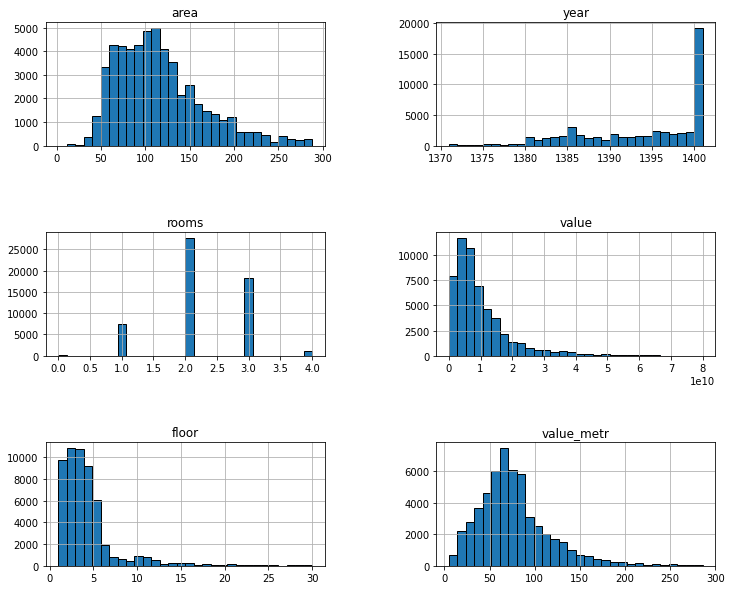

In [29]:
df2 = df[['area', 'year', 'rooms', 'value', 'floor', 'value_metr']]
df2.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

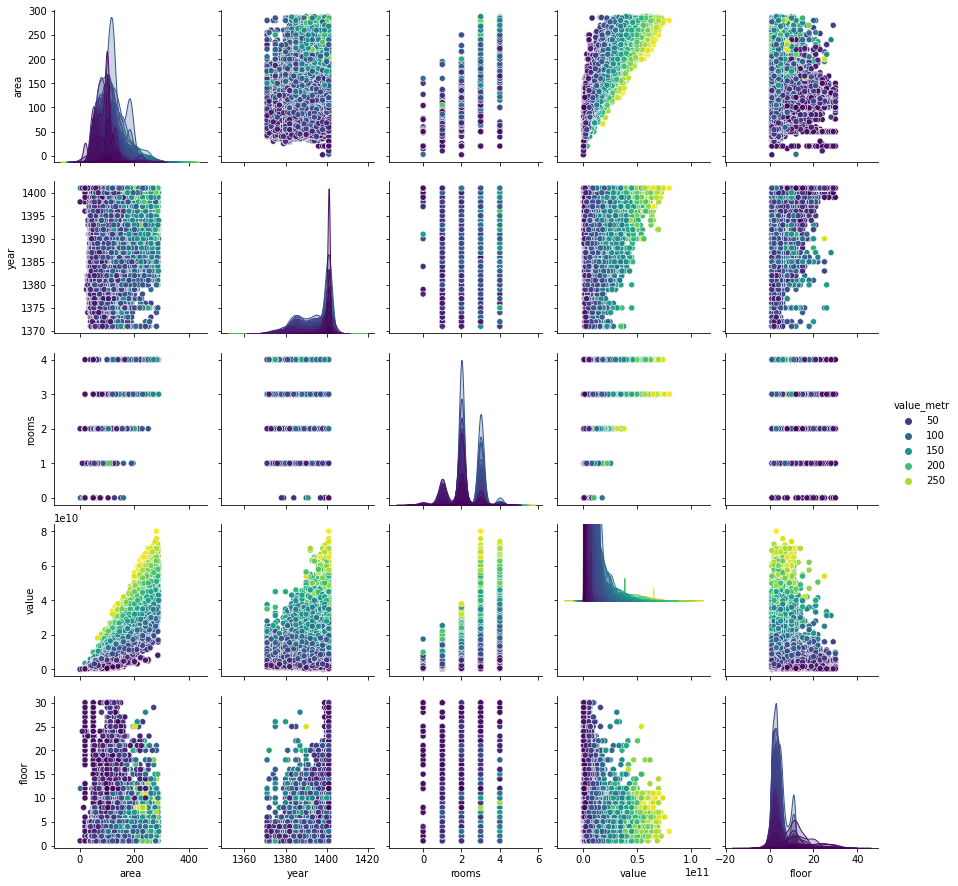

In [108]:
df2 = df[['area', 'year', 'rooms', 'value', 'floor', 'value_metr']]
sns.pairplot(data=df2, hue="value_metr", palette="viridis")

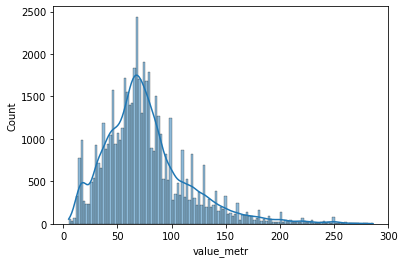

In [17]:
sns.histplot(df["value_metr"], kde=True)

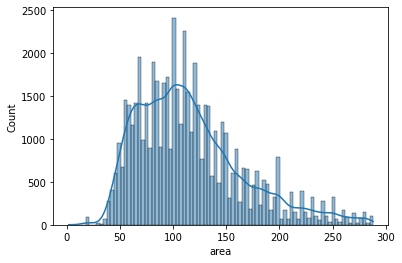

In [18]:
sns.histplot(df["area"], kde=True)

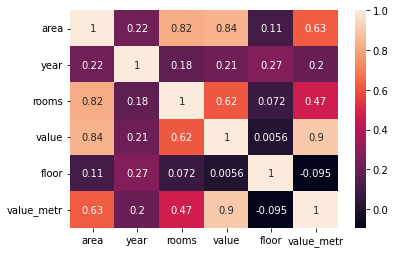

In [109]:
df2_ = df[['area', 'year', 'rooms', 'value', 'floor', 'value_metr']]
sns.heatmap(df2_.corr(), annot=True)

# Train

# Linear regression model

# 1

In [33]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [34]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.3)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
linear1 = LinearRegression()
linear1.fit(X1_train, y1_train)
y1_pred = linear1.predict(X1_test)

In [37]:
print("MSE lr: ", metrics.mean_squared_error(y1_test, y1_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y1_test, y1_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y1_test, y1_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y1_test, y1_pred))
print("MAE lr: ", metrics.mean_absolute_error(y1_test, y1_pred))

MSE lr:  2.8346441920061034e-13
RMSE lr:  5.32413766914991e-07
R2_SCORE lr:  0.9999999999999992
MAPE lr:  0.07426718894728719
MAE lr:  1.684241540877022e-07


# 2

In [38]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size=0.3)
st_x= StandardScaler()    
X2_train= st_x.fit_transform(X2_train)    
X2_test= st_x.transform(X2_test)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
linear2 = LinearRegression()
linear2.fit(X2_train, y2_train)
y2_pred = linear2.predict(X2_test)

In [42]:
print("MSE lr: ", metrics.mean_squared_error(y2_test, y2_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y2_test, y2_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y2_test, y2_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y2_test, y2_pred))
print("MAE lr: ", metrics.mean_absolute_error(y2_test, y2_pred))

MSE lr:  2.368413267136737e-12
RMSE lr:  1.538964998671749e-06
R2_SCORE lr:  1.0
MAPE lr:  0.03694312056159818
MAE lr:  3.872217930235808e-07


# 3

In [43]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.3)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
linear3 = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
linear3.fit(X3_train, y3_train)
y3_pred = linear3.predict(X3_test)

In [49]:
print("MSE lr: ", metrics.mean_squared_error(y3_test, y3_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y3_test, y3_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y3_test, y3_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y3_test, y3_pred))
print("MAE lr: ", metrics.mean_absolute_error(y3_test, y3_pred))

MSE lr:  1.3402657336852028e-12
RMSE lr:  1.1576984640592744e-06
R2_SCORE lr:  1.0
MAPE lr:  0.08594375874102167
MAE lr:  2.7434307407925395e-07


# Ridge model

# 1

In [50]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [51]:
from sklearn.model_selection import train_test_split
a1_train, a1_test, b1_train, b1_test = train_test_split(X,y, test_size=0.3)

In [52]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [ ]:
ridge1 = Ridge(alpha=0.9)
ridge1.fit(a1_train, b1_train)
b1_pred = ridge1.predict(a1_test)

In [54]:
print("MSE ridge: ", metrics.mean_squared_error(b1_test, b1_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b1_test, b1_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b1_test, b1_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b1_test, b1_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b1_test, b1_pred))

MSE ridge:  7.53587718858364e-10
RMSE ridge:  2.7451552212185818e-05
R2_SCORE ridge:  0.9999999951968981
MAPE ridge:  11432083797.126583
MAE ridge:  1.4026949536297225e-05


# 2

In [55]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
a2_train, a2_test, b2_train, b2_test = train_test_split(X,y, test_size=0.3)
st_a= StandardScaler()    
a2_train= st_a.fit_transform(a2_train)    
a2_test= st_a.transform(a2_test)

In [57]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [58]:
ridge2 = Ridge(alpha=0.9)
ridge2.fit(a2_train, b2_train)
b2_pred = ridge2.predict(a2_test)

In [59]:
print("MSE ridge: ", metrics.mean_squared_error(b2_test, b2_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b2_test, b2_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b2_test, b2_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b2_test, b2_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b2_test, b2_pred))

MSE ridge:  108557452403.35345
RMSE ridge:  329480.5797059266
R2_SCORE ridge:  0.9999999972140989
MAPE ridge:  1087429683.9079547
MAE ridge:  73893.43095150616


# 3

In [60]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
a3_train, a3_test, b3_train, b3_test = train_test_split(X,y, test_size=0.3)

In [62]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [63]:
ridge3 = make_pipeline(preprocessing.StandardScaler(), Ridge())
ridge3.fit(a3_train, b3_train)
b3_pred = ridge3.predict(a3_test)

In [64]:
print("MSE ridge: ", metrics.mean_squared_error(b3_test, b3_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b3_test, b3_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b3_test, b3_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b3_test, b3_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b3_test, b3_pred))

MSE ridge:  138037225171.54663
RMSE ridge:  371533.6124384261
R2_SCORE ridge:  0.9999999965473558
MAPE ridge:  1202923159.8762932
MAE ridge:  83152.86616987624


# SGD model

# 1

In [97]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [98]:
from sklearn.model_selection import train_test_split
m1_train, m1_test, n1_train, n1_test = train_test_split(X,y, test_size=0.3)

In [99]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [ ]:
sgd1 = SGDRegressor(max_iter=1000, tol=1e-3)
sgd1.fit(m1_train, n1_train)
n1_pred = sgd1.predict(m1_test)

In [ ]:
print("MSE sgd: ", metrics.mean_squared_error(n1_test, n1_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n1_test, n1_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n1_test, n1_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n1_test, n1_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n1_test, n1_pred))

# 2

In [70]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
m2_train, m2_test, n2_train, n2_test = train_test_split(X,y, test_size=0.3)
st_m= StandardScaler()    
m2_train= st_m.fit_transform(m2_train)    
m2_test= st_m.transform(m2_test)

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [ ]:
sgd2 = SGDRegressor()
sgd2.fit(m2_train, n2_train)
n2_pred = sgd2.predict(m2_test)

In [ ]:
print("MSE sgd: ", metrics.mean_squared_error(n2_test, n2_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n2_test, n2_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n2_test, n2_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n2_test, n2_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n2_test, n2_pred))

# 3

In [82]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
m3_train, m3_test, n3_train, n3_test = train_test_split(X,y, test_size=0.3)

In [84]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [ ]:
sgd3 = make_pipeline(preprocessing.StandardScaler(), SGDRegressor())
sgd3.fit(m3_train, n3_train)
n3_pred = ridge3.predict(m3_test)

In [ ]:
print("MSE sgd: ", metrics.mean_squared_error(n3_test, n3_pred))
print("RMSE sgd: ", (metrics.mean_squared_error(n3_test, n3_pred))**(1/2.0))
print("R2_SCORE sgd: ", metrics.r2_score(n3_test, n3_pred))
print("MAPE sgd: ", metrics.mean_absolute_percentage_error(n3_test, n3_pred))
print("MAE sgd: ", metrics.mean_absolute_error(n3_test, n3_pred))

# Polynomial regression model

# degree 2

In [74]:
X= df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values
y=df.loc[:,['area', 'year', 'rooms', 'value', 'floor', 'warehouse', 'parking', 'warehouse', 'value_metr']].values

In [75]:
from sklearn.model_selection import train_test_split
c_train, c_test, d_train, d_test = train_test_split(X,y, test_size=0.3)

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
polyRegressor = PolynomialFeatures(degree=2)
c_train_poly = polyRegressor.fit_transform(c_train)
c_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c_train_poly, d_train)
d_pred = poly.predict(c_test_poly)

In [78]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d_pred))

MSE poly:  466.33585937068193
RMSE poly:  21.594810936210624
R2_SCORE poly:  0.7264304877852819
MAPE poly:  54428769857043.81
MAE poly:  6.187625444611705


# degree 3

In [111]:
polyRegressor = PolynomialFeatures(degree=3)
c1_train_poly = polyRegressor.fit_transform(c_train)
c1_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c1_train_poly, d_train)
d1_pred = poly.predict(c1_test_poly)

In [112]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d1_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d1_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d1_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d1_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d1_pred))

MSE poly:  1.641326412014987e+17
RMSE poly:  405132868.5770863
R2_SCORE poly:  0.4068421250761054
MAPE poly:  115977989091855.0
MAE poly:  97992033.3968272
